In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
with tf.device('/gpu:0'):
    pass

In [3]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"E:\Dataset 2\Train",
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 1128 files belonging to 3 classes.


In [5]:
len(train_ds)

36

In [6]:
train_ds.class_names

['312', 'Aajra Ghanasal', 'Sonam']

In [7]:
# test_data 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"E:\Dataset 2\Validation",
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size = (180,180,3)
    batch_size = batch_size             # 32
)

Found 283 files belonging to 3 classes.


In [8]:
len(val_ds)

9

In [9]:
# test dataset belong classe name 
val_ds.class_names

['312', 'Aajra Ghanasal', 'Sonam']

In [10]:
# this is tensore form because multidimension data 
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# convert simple form 
# fetch 1 batch , 1 batch have 32 files  
for image_batch , lable_batch in val_ds.take(1) :
    print('this is one batch shape :',image_batch.shape)  # (batch_size,img_height,img_width,chanells)  
    print('this is lable shape :',lable_batch.shape)

this is one batch shape : (32, 180, 180, 3)
this is lable shape : (32,)


In [12]:
# normal formn 
for image_batch , label_batch in train_ds.take(1):
    print(image_batch.numpy())
    print('\n')
    print('convergt the lable in numeric : ',label_batch.numpy())

[[[[1.29101852e+02 1.11101852e+02 6.31018524e+01]
   [1.34061111e+02 1.16061111e+02 6.65500031e+01]
   [1.34020370e+02 1.16020370e+02 6.79314880e+01]
   ...
   [1.62935089e+02 2.06935089e+02 5.84315147e+01]
   [1.77683334e+02 2.21438889e+02 5.78055573e+01]
   [1.77455231e+02 2.20353363e+02 5.39034195e+01]]

  [[1.28894440e+02 1.10894447e+02 6.28944435e+01]
   [1.37633331e+02 1.16633331e+02 6.96333313e+01]
   [1.44200012e+02 1.26200005e+02 7.82000046e+01]
   ...
   [1.69377472e+02 2.16377472e+02 6.00553551e+01]
   [1.80949997e+02 2.22949997e+02 6.25833321e+01]
   [1.79772446e+02 2.22772446e+02 5.56669922e+01]]

  [[1.23546303e+02 1.05546303e+02 5.75462990e+01]
   [1.40388885e+02 1.20888885e+02 7.33888855e+01]
   [1.50287033e+02 1.33305557e+02 8.47962875e+01]
   ...
   [1.75000000e+02 2.19611115e+02 5.93888855e+01]
   [1.81666656e+02 2.26500000e+02 6.18055573e+01]
   [1.75657150e+02 2.17657150e+02 4.75276413e+01]]

  ...

  [[1.39898148e+02 1.89898148e+02 5.48981514e+01]
   [1.40500000e+

In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These class_names = orrespond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['312', 'Aajra Ghanasal', 'Sonam']
3


(32, 180, 180, 3)
[1 1 1 2 0 1 1 1 2 2 1 0 2 1 2 0 1 0 1 2 2 2 1 1 0 0 1 0 1 1 2 2]


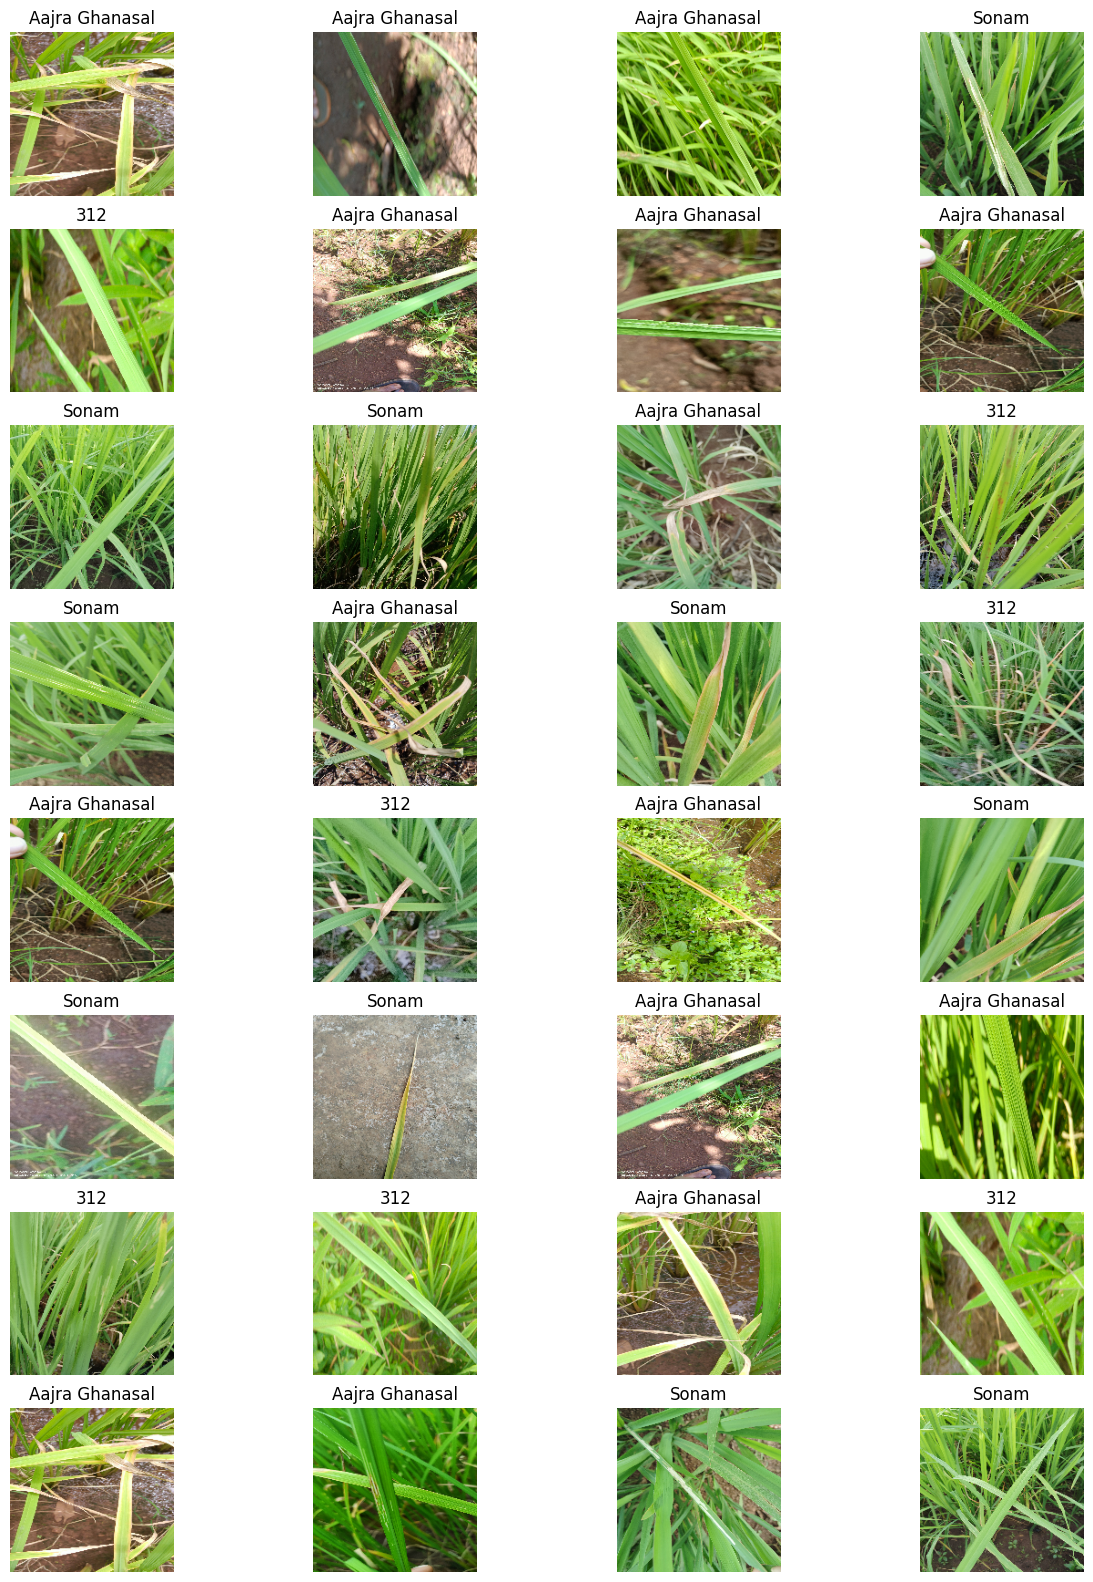

In [14]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(15,20))
for image_batch , labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

In [15]:
# incress the perfomance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [16]:
    # resize and rescale the value 
#resize_and_rescale = tf.keras.Sequential([
   # tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
   # tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
#])

In [17]:
# Set the desired image height and width
img_height = 299
img_width = 299

# Create a preprocessing model
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_height, img_width),
    tf.keras.layers.Rescaling(1.0/255)
])

In [18]:
# data augmentation

#data_augmentation = tf.keras.Sequential([
  #  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
   # tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
#])

In [19]:

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.3)
])

In [20]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,BatchNormalization

In [21]:
input_shape = (batch_size , img_height , img_width , channels)

In [22]:
# create CNN model

model = Sequential()


model.add(resize_and_rescale)

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.10))

model.add(Dense(n_classes))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.build(input_shape)

In [25]:
# View the summary of all layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 299, 299, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 299, 299, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 299, 299, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 299, 299, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 149, 149, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 149, 149, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 74, 74, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 350464)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 32)               │    11,214,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 64)               │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,273,507 (43.01 MB)

 Trainable params: 11,273,507 (43.01 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
epochs =5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.4644 - loss: 2.0349 - val_accuracy: 0.4947 - val_loss: 0.9426
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.5540 - loss: 0.8644 - val_accuracy: 0.6714 - val_loss: 0.7917
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.5921 - loss: 0.8291 - val_accuracy: 0.5830 - val_loss: 0.8601
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.6332 - loss: 0.7769 - val_accuracy: 0.5477 - val_loss: 0.8781
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.6381 - loss: 0.7498 - val_accuracy: 0.5300 - val_loss: 0.9059


In [27]:
# accuracy of model each epochs
history.history['accuracy']

[0.5008864998817444,
 0.588652491569519,
 0.609929084777832,
 0.6276595592498779,
 0.6604610085487366]

In [28]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.4946996569633484,
 0.6713780760765076,
 0.583038866519928,
 0.547703206539154,
 0.5300353169441223]

In [29]:
 #lost
history.history['loss']

[1.3527058362960815,
 0.8310016393661499,
 0.8007016181945801,
 0.7863438129425049,
 0.6970173716545105]

# Visualizing training results

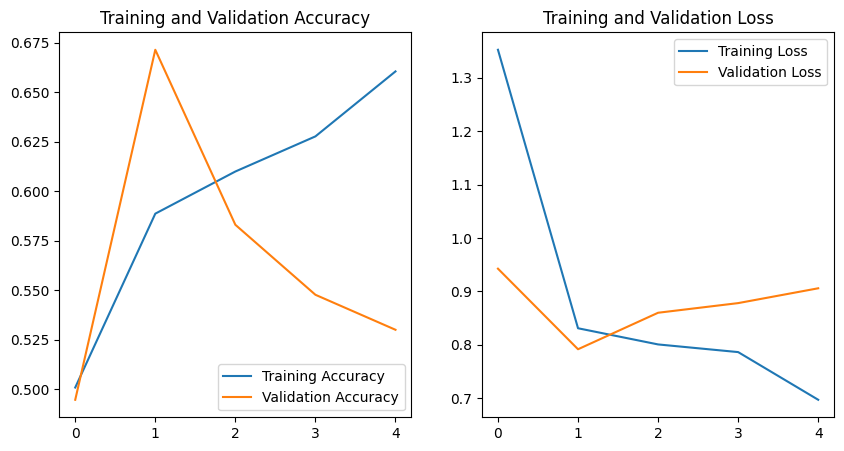

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
Traning-accuracy = 48 and

validation-accuracy = 37

this is underfit model not good acurracy of traning and validation dataset

Write your findings here

In [31]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# data augmentation


# Data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


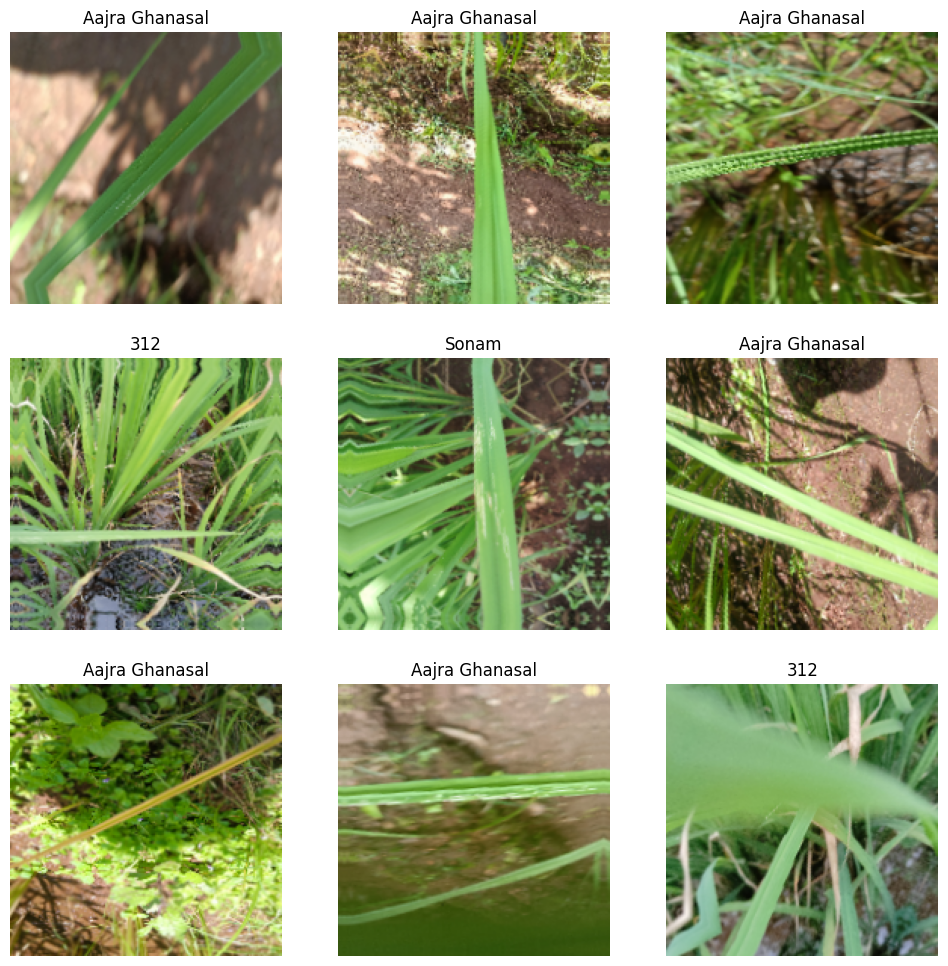

In [32]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Todo:
Create the model, compile and train the model

In [33]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()

model.add(data_augmentation)

model.add(resize_and_rescale)

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(n_classes))

Compiling the model

In [34]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
## Your code goes here, note: train your model for 20 epochs
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 561ms/step - accuracy: 0.4355 - loss: 2.2738 - val_accuracy: 0.4947 - val_loss: 0.9825
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 504ms/step - accuracy: 0.5367 - loss: 0.8682 - val_accuracy: 0.7138 - val_loss: 0.8602
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 495ms/step - accuracy: 0.6381 - loss: 0.7740 - val_accuracy: 0.5194 - val_loss: 0.8058
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 505ms/step - accuracy: 0.6649 - loss: 0.7192 - val_accuracy: 0.6890 - val_loss: 0.7485
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 484ms/step - accuracy: 0.6782 - loss: 0.6722 - val_accuracy: 0.5901 - val_loss: 0.7318


# Visualizing the results

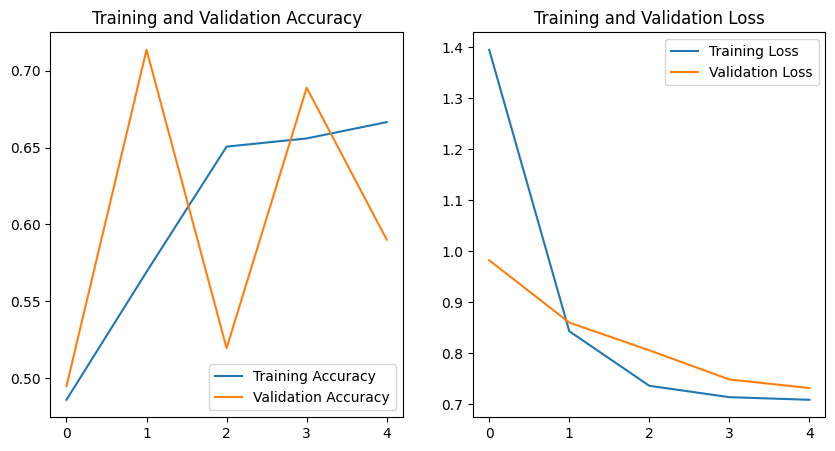

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.


In [37]:
class_names

['312', 'Aajra Ghanasal', 'Sonam']

In [38]:
data_dir_train = pathlib.Path(r"E:\Project dataset\Train")

In [39]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

1128


In [40]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))

In [41]:
count

[241, 578, 309]

<BarContainer object of 3 artists>

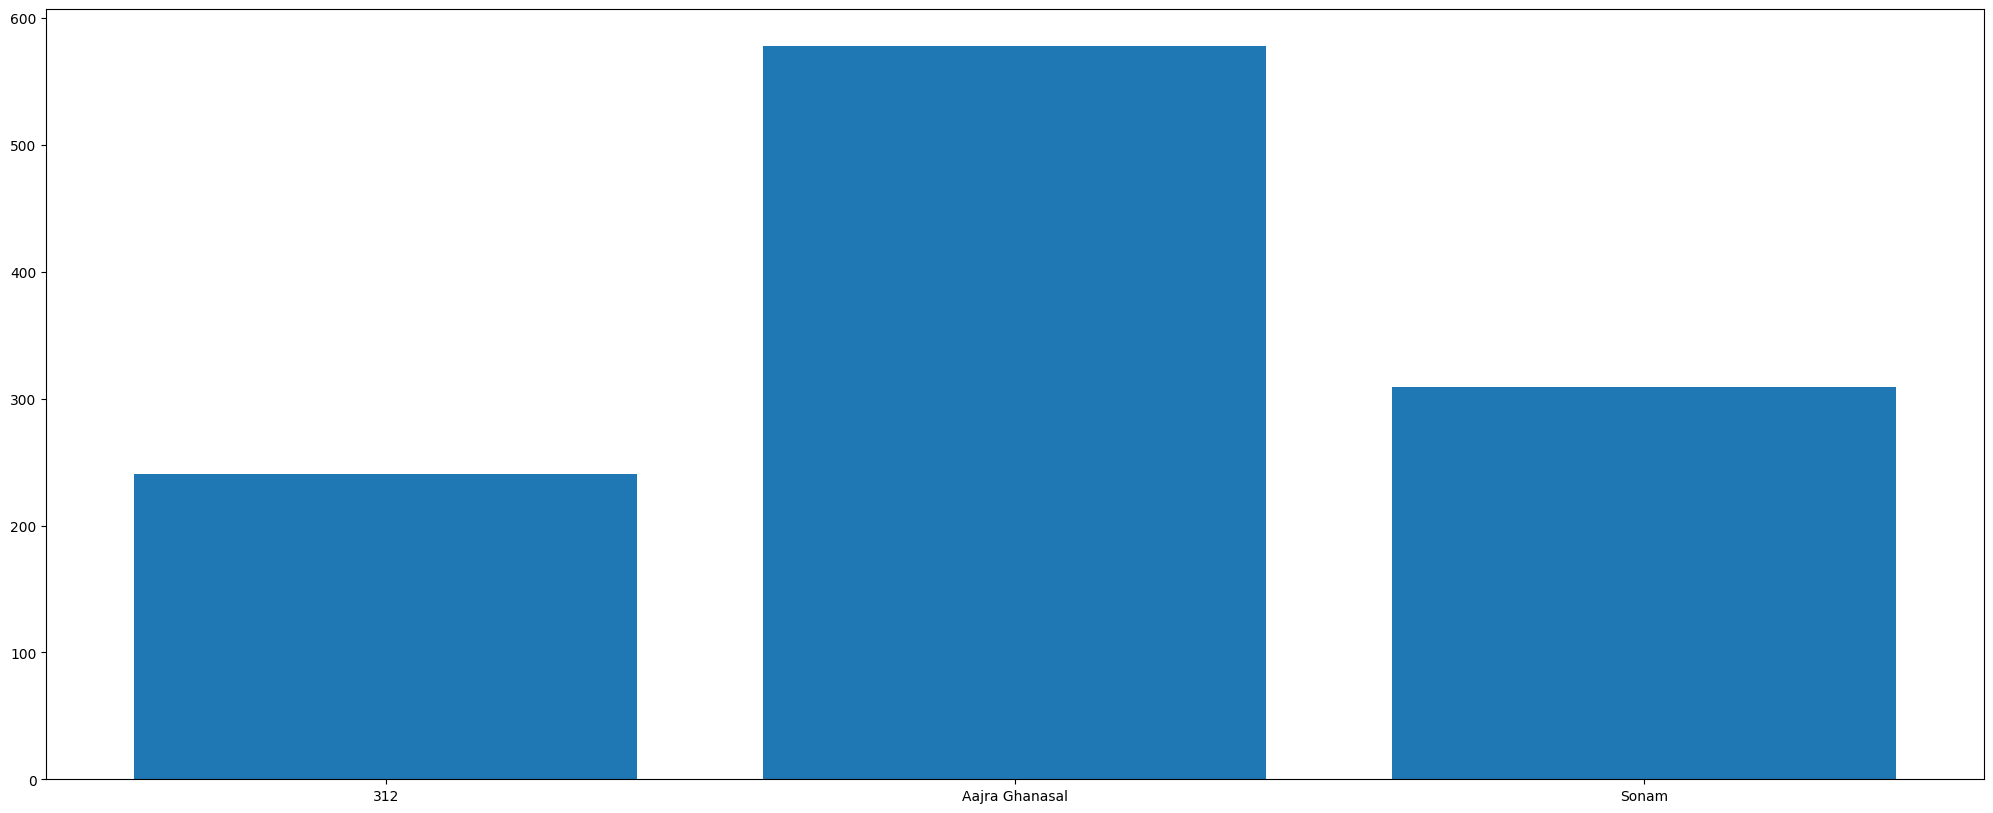

In [42]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#Todo: Write your findings here:
- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?
Todo: Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [65]:
!pip install Augmentor

In [43]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 241 image(s) found.
Output directory set to E:\Project dataset\Train/312\output.

Processing <PIL.Image.Image image mode=RGB size=3072x4080 at 0x183B7103D70>: 100%|██████████| 500/500 [01:11<00:00,  6.95 Samples/s]                  


Initialised with 578 image(s) found.
Output directory set to E:\Project dataset\Train/Aajra Ghanasal\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4000x2250 at 0x183B59A03E0>: 100%|██████████| 500/500 [00:49<00:00, 10.06 Samples/s]


Initialised with 309 image(s) found.
Output directory set to E:\Project dataset\Train/Sonam\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x4080 at 0x183B74E6930>: 100%|██████████| 500/500 [01:02<00:00,  7.96 Samples/s]


In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

3000


#`Lets see the distribution of augmented data after adding new images to the original training data.

<BarContainer object of 3 artists>

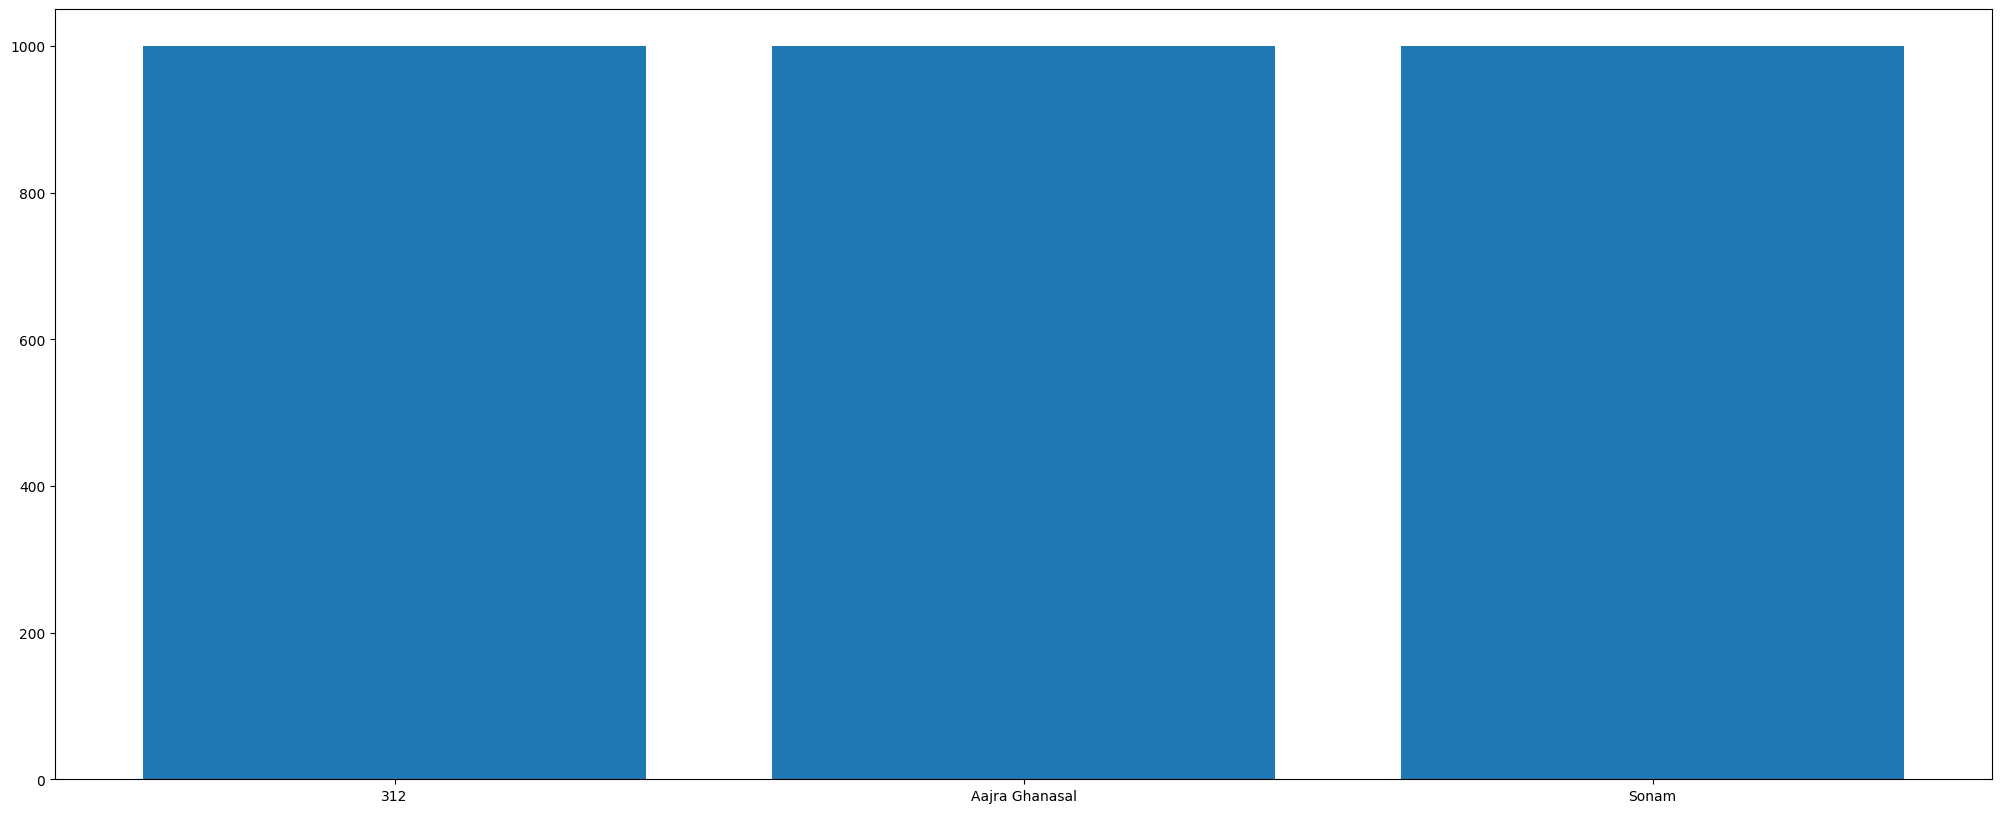

In [45]:
# Check the distribution of data again. 
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

Lets see the distribution of augmented data after adding new images to the original training data.

In [46]:
import os
from glob import glob

In [47]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['E:\\Project dataset\\Train\\312\\output\\312_original_IMG20240915175154.jpg_ca1844ef-9975-46c6-b24b-daeb3c26e211.jpg',
 'E:\\Project dataset\\Train\\312\\output\\312_original_IMG20240915175154.jpg_e25ff152-d5e5-42db-a3b3-ff0227a0a7d9.jpg',
 'E:\\Project dataset\\Train\\312\\output\\312_original_IMG20240915175225.jpg_cb7df54f-8010-4d33-8ed8-acb6785470b7.jpg',
 'E:\\Project dataset\\Train\\312\\output\\312_original_IMG20240915175225.jpg_d3d5c597-77c4-4dc6-b44e-6894fb193920.jpg',
 'E:\\Project dataset\\Train\\312\\output\\312_original_IMG20240915175225.jpg_d4793a39-f253-43ce-b21d-57987aaf348b.jpg',
 'E:\\Project dataset\\Train\\312\\output\\312_original_IMG20240915175225.jpg_e6d7a63b-d2f5-47c6-989f-b03a2e8d6652.jpg',
 'E:\\Project dataset\\Train\\312\\output\\312_original_IMG20240915175225.jpg_f472908d-1e00-41b9-bfcf-ee7690165b3b.jpg',
 'E:\\Project dataset\\Train\\312\\output\\312_original_IMG20240915175225.jpg_fd8e35ce-c867-4b18-a715-14b718ef0590.jpg',
 'E:\\Project dataset\\Train\\31

In [48]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',
 '312',


In [49]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [50]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [51]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [52]:
new_df['Label'].value_counts()


Label
Aajra Ghanasal    1578
Sonam             1309
312               1241
Name: count, dtype: int64

# Todo: Train the model on the data created using Augmento

In [53]:
batch_size = 32
img_height = 180
img_width = 180

In [54]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4128 files belonging to 3 classes.
Using 3303 files for training.


In [55]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4128 files belonging to 3 classes.
Using 825 files for validation.


Todo: Create your model (make sure to include normalization)

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [60]:
from tensorflow.keras.layers import Rescaling
from tensorflow.keras import layers

model = Sequential([
    Rescaling(1./255),  # Updated to use Rescaling directly from keras.layers
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes)
])
from tensorflow.keras.layers import BatchNormalization
model.add(BatchNormalization())

In [61]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [63]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 390ms/step - accuracy: 0.9948 - loss: 0.1717 - val_accuracy: 0.9782 - val_loss: 0.1766
Epoch 2/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 396ms/step - accuracy: 0.9935 - loss: 0.1514 - val_accuracy: 0.9794 - val_loss: 0.1615
Epoch 3/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 389ms/step - accuracy: 0.9844 - loss: 0.1568 - val_accuracy: 0.9855 - val_loss: 0.1179
Epoch 4/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 37s 350ms/step - accuracy: 0.9989 - loss: 0.1083 - val_accuracy: 0.9879 - val_loss: 0.1075
Epoch 5/5
104/104 ━━━━━━━━━━━━━━━━━━━━ 36s 343ms/step - accuracy: 0.9976 - loss: 0.0974 - val_accuracy: 0.9855 - val_loss: 0.0912


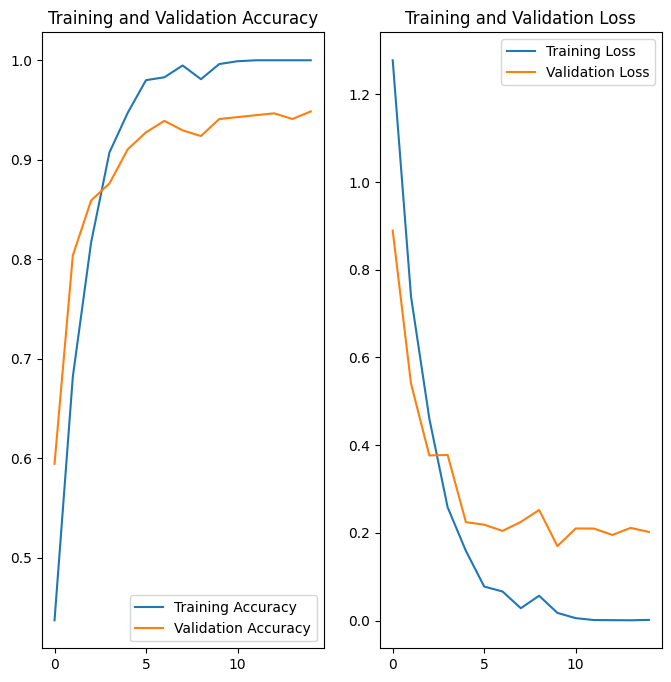

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()